# MIMII

## 1. Installing packages

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install librosa

  Using cached numpy-1.20.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
Note: you may need to restart the kernel to use updated packages.


## 2. Importing libraries

In [3]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

## 3. Loading data

In [6]:
#path of wav file
#normal_w6 = "/Users/yusufakcakaya/Desktop/MIMII Dataset/valve/id_00/normal/00000000.wav"
#abnormal_w6 = "/Users/yusufakcakaya/Desktop/MIMII Dataset/valve/id_00/abnormal/00000000.wav"
normal_w6 = "Valve_normal_6_00000000.wav"
abnormal_w6 = "Valve_abnormal_6_00000000.wav"

# x → audio time series
# sr → sound frequency(Hz)
x,sr = librosa.load(normal_w6)

x_abnormal,sr_abnormal = librosa.load(abnormal_w6)

print("x type:",type(x),"sr type",type(sr))

print(x.shape,sr)

x type: <class 'numpy.ndarray'> sr type <class 'int'>
(220500,) 22050


(128, 313)


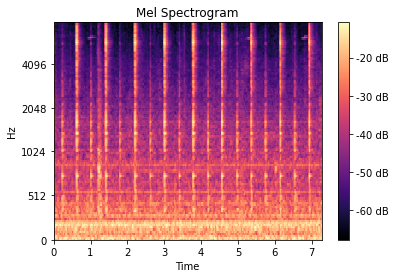

In [42]:
y_trial, sr_trial = librosa.load(normal_w6, sr=None)
mel_spect = librosa.feature.melspectrogram(y=y_trial, sr=sr_trial)#, n_fft=2048, hop_length=1024)
mel_spect_DB = librosa.power_to_db(mel_spect)#, ref=np.max)
librosa.display.specshow(mel_spect_DB, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB')
print(mel_spect_DB.shape)

In [20]:
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default ``sr=22050``).
    
    To preserve the native sampling rate of the file, use ``sr=None``.
    
    Parameters
    ----------
    path : string, int, pathlib.Path or file-like object
        path to the input file.
    
        Any codec supported by `soundfile` or `audioread` will work.
    
        Any string file paths, or any object implementing Python's
        file interface (e.g. `pathlib.Path`) are supported as `path`.
    
        If the codec is supported by `soundfile`, then `path` can also be
        an open file descriptor (int).
    
        On the contrary, if the codec is not supported by `soundfile`
        (for example, MP3), then `path` must be a file path (string or `pat

## 4. Data Visualisation

### 1. Signal

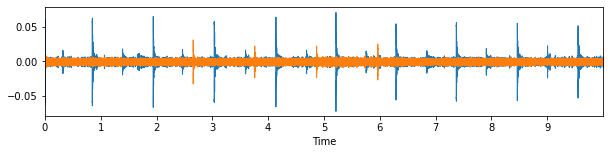

In [8]:
# Viewing audio

plt.figure(figsize=(10,2))
librosa.display.waveplot(x,sr=sr)


librosa.display.waveplot(x_abnormal,sr=sr_abnormal)

### 2. Spectrogram

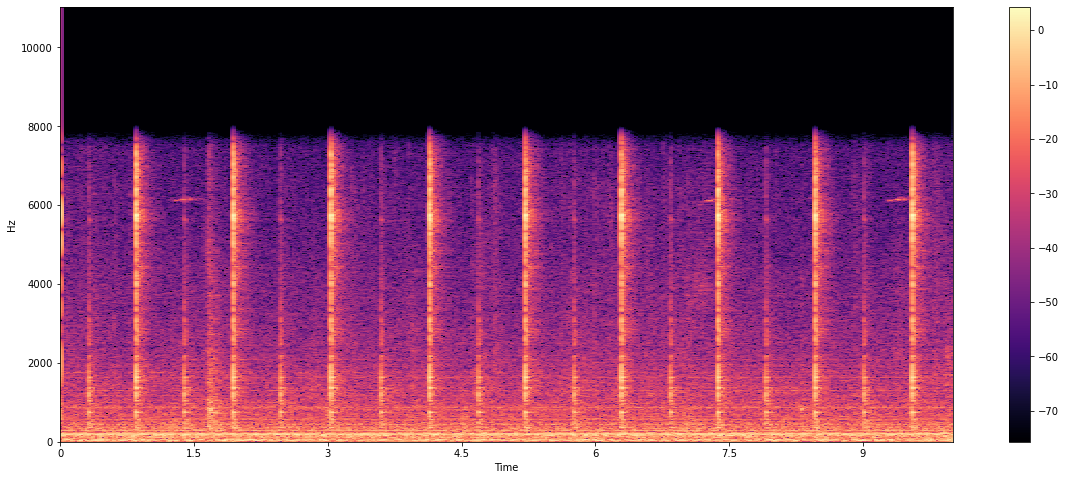

In [9]:
X=librosa.stft(x) # stft -> Short-time Fourier transform

Xdb=librosa.amplitude_to_db(abs(X)) # Amplitude to Decibel

plt.figure(figsize=(20,8))

librosa.display.specshow(Xdb, sr= sr, x_axis= "time", y_axis= "hz")
plt.colorbar()

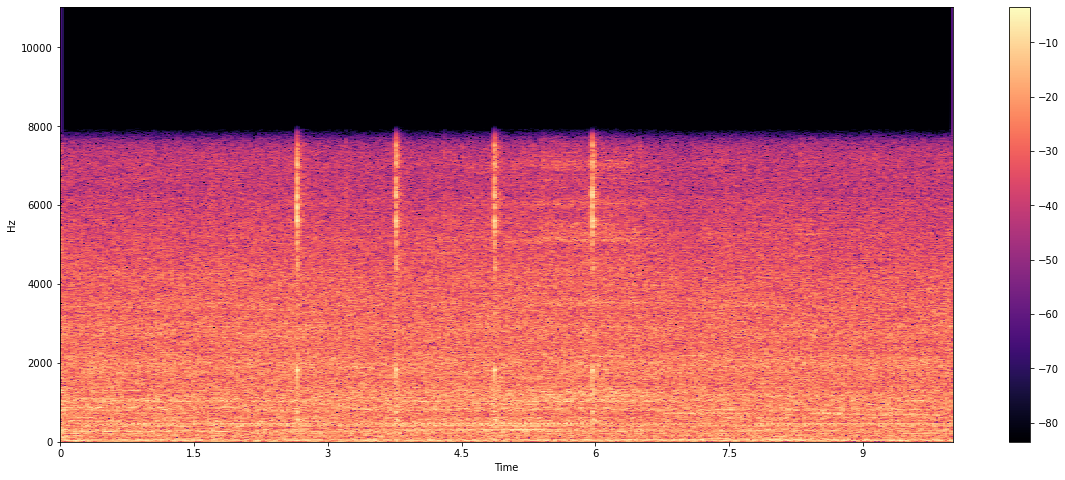

In [10]:
X= librosa.stft(x_abnormal) # stft -> Short-time Fourier transform

Xdb=librosa.amplitude_to_db(abs(X)) # Amplitude to Decibel

plt.figure(figsize=(20,8))

librosa.display.specshow(Xdb, sr= sr_abnormal, x_axis= "time", y_axis= "hz")
plt.colorbar()


In [11]:
print("x type:",type(Xdb))
print(Xdb.shape)

x type: <class 'numpy.ndarray'>
(1025, 431)


### 3. Mel Spectrogram

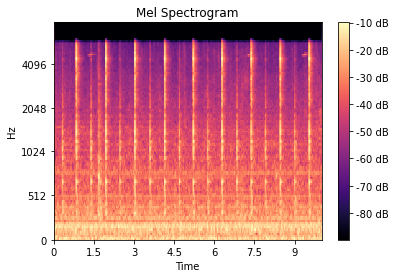

In [34]:
mel_spect = librosa.feature.melspectrogram(y=x, sr=sr)#, n_fft=2048, hop_length=1024)
mel_spect_DB = librosa.power_to_db(mel_spect)#, ref=np.max)
librosa.display.specshow(mel_spect_DB, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB')

In [36]:
mel_spect_DB.flatten().shape

(55168,)

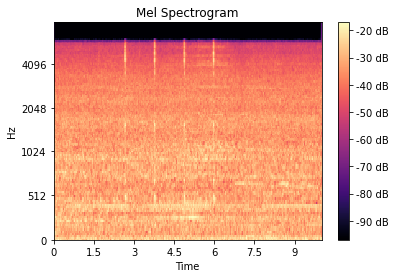

In [37]:
mel_spect_ab = librosa.feature.melspectrogram(y=x_abnormal, sr=sr_abnormal)#, n_fft=2048, hop_length=1024)
mel_spect_ab_DB = librosa.power_to_db(mel_spect_ab)#, ref=np.max)
librosa.display.specshow(mel_spect_ab_DB, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB')

In [39]:
mel_spect_ab_DB.flatten().shape

(55168,)

In [17]:
help(librosa.feature.melspectrogram)

Help on function melspectrogram in module librosa.feature.spectral:

melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', power=2.0, **kwargs)
    Compute a mel-scaled spectrogram.
    
    If a spectrogram input ``S`` is provided, then it is mapped directly onto
    the mel basis by ``mel_f.dot(S)``.
    
    If a time-series input ``y, sr`` is provided, then its magnitude spectrogram
    ``S`` is first computed, and then mapped onto the mel scale by
    ``mel_f.dot(S**power)``.
    
    By default, ``power=2`` operates on a power spectrum.
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)] or None
        audio time-series
    
    sr : number > 0 [scalar]
        sampling rate of ``y``
    
    S : np.ndarray [shape=(d, t)]
        spectrogram
    
    n_fft : int > 0 [scalar]
        length of the FFT window
    
    hop_length : int > 0 [scalar]
        number of samples between succes

In [28]:
def mel_spect(y,sr):
    """
    
    """
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spect_DB = librosa.power_to_db(mel_spect).flatten()
    return mel_spect_DB

def spect_display(spect, kind:str):
    librosa.display.specshow(spect, y_axis=kind, fmax=8000, x_axis='time')
    if kind == "mel":
        plt.title('Mel Spectrogram');
    else:
        plt.title("Spectrogram")
    plt.colorbar(format='%+2.0f dB')